In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
from google.colab import drive
drive.mount('/content/drive')
massCrime = pd.read_csv("/MassTest.csv", names = ["city","population","violentcrime","murder","rape","robbery","aggravatedassault","propertycrime","burglary","larcenytheft","vehicletheft","arson"])
bostonCrime = pd.read_csv("/boston_2022.csv")
gunCrime = pd.read_csv("/GunCrime.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print(bostonCrime.shape)
print(gunCrime.shape)
print(massCrime.shape)


(63367, 17)
(1764, 8)
(301, 12)


In [32]:
print("Columns Present in Mass Crime.")
print(massCrime.head(1))

Columns Present in Mass Crime.
       city population violentcrime  murder  rape  robbery aggravatedassault  \
0  Abington     17,623           29       0     2        1                26   

  propertycrime burglary larcenytheft vehicletheft  arson  
0           139       12          111           16      1  


In [34]:
print("Columns Present in Gun Crime.")
print(gunCrime.head(1))


Columns Present in Gun Crime.
    incident_num           shooting_date district shooting_type_v2  \
0  I152000196-00  2015-01-01 13:30:00+00      C11        Non-Fatal   

  victim_gender                victim_race  victim_ethnicity_NIBRS  \
0          Male  Black or African American  Not Hispanic or Latinx   

  multi_victim  
0            f  


In [33]:
print("Columns Present in Boston Crime.")
print(bostonCrime.head(1))

Columns Present in Boston Crime.
   INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP OFFENSE_DESCRIPTION  \
0         87066666          3301                 NaN      VERBAL DISPUTE   

  DISTRICT REPORTING_AREA  SHOOTING OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  \
0       B2            300         0   07-04-22 19:30  2022      4    Thursday   

   HOUR  UCR_PART          STREET  Lat  Long Location  
0    19       NaN  THORNTON PLACE  0.0   0.0   (0, 0)  


In [52]:
#Sorting The Records based on Population
massCrime = massCrime.replace(',','', regex=True)
massCrime['population'] = massCrime['population'].astype(int)
massCrime = massCrime.sort_values("population", ascending=False)
top10MassCrime = massCrime.head(10)
top10BostonCrime = bostonCrime.head(10)
ImpMassCrime = top10MassCrime[["population","city","murder","rape","robbery"]]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


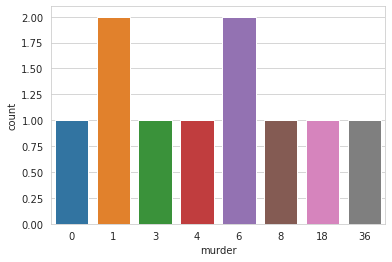

In [28]:
# Scatter Plot X axis as city and y axis as population
# top10MassCrime.plot(kind='scatter', x='city', y='population') ;
# MassCrime = sns.load_dataset("top10MassCrime")
sns.countplot(ImpMassCrime['murder']);


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


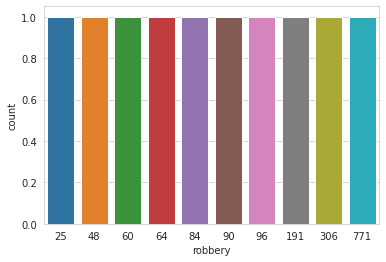

In [108]:

sns.countplot(ImpMassCrime['robbery'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


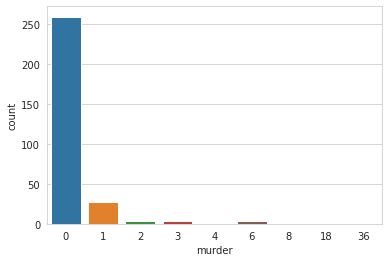

In [34]:
sns.countplot(massCrime['murder']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


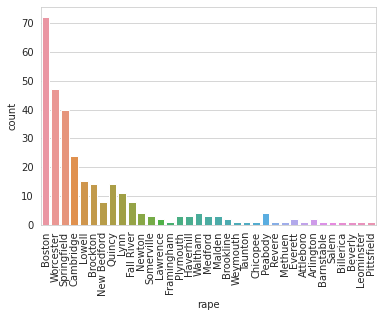

In [92]:
# Count Plot of Crime Rape City Wise
x = sns.countplot(massCrime['rape']);
x.set_xticklabels(massCrime['city'], rotation = 90);


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


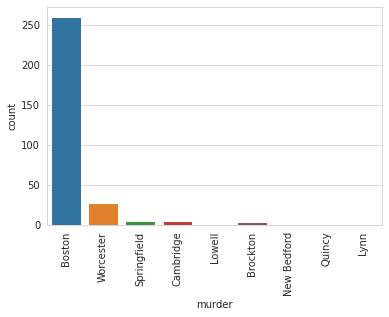

In [95]:
# Count Plot of Crime Murder City Wise
x = sns.countplot(massCrime['murder']);
x.set_xticklabels(massCrime['city'], rotation = 90);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


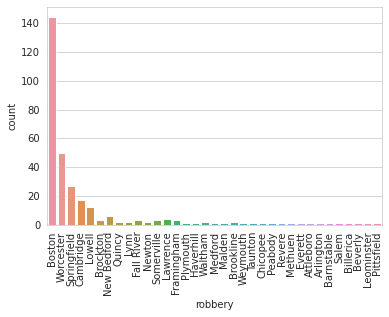

In [96]:
# Count Plot of Crime Robbery City Wise
x = sns.countplot(massCrime['robbery']);
x.set_xticklabels(massCrime['city'], rotation = 90);

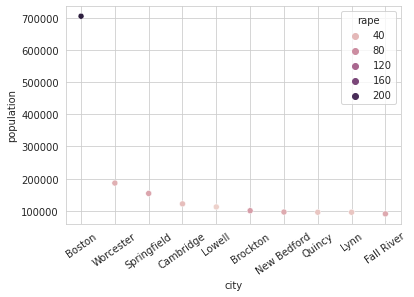

In [83]:
# Scatter Plot of Crime Rape City Wise
x = sns.scatterplot(data = top10MassCrime, x = 'city',y = 'population', hue = 'rape' );
x.set_xticklabels(top10MassCrime["city"], rotation = 35);

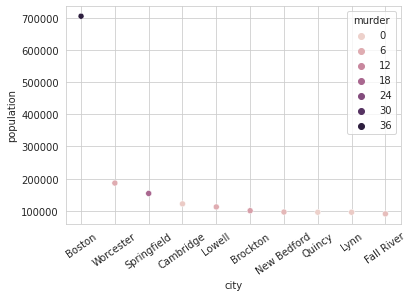

In [84]:
# Scatter Plot of Crime Murder City Wise
x = sns.scatterplot(data = top10MassCrime, x = 'city',y = 'population', hue = 'murder' );
x.set_xticklabels(top10MassCrime["city"], rotation = 35);

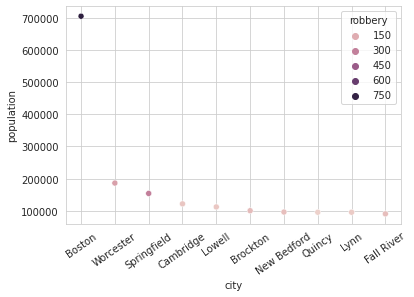

In [86]:
# Scatter Plot of Crime robbery City Wise 
# Combining all Three Crimes city wise
x = sns.scatterplot(data = top10MassCrime, x = 'city',y = 'population', hue = 'robbery' );
x.set_xticklabels(top10MassCrime["city"], rotation = 35);

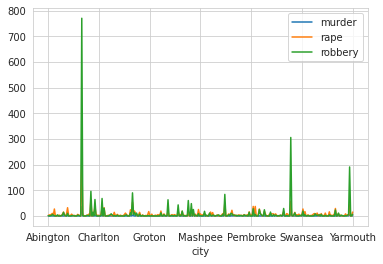

In [114]:
# Major Crimes in all Cities of Mass
massCrime.plot("city",[ "murder", "rape", "robbery",])

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


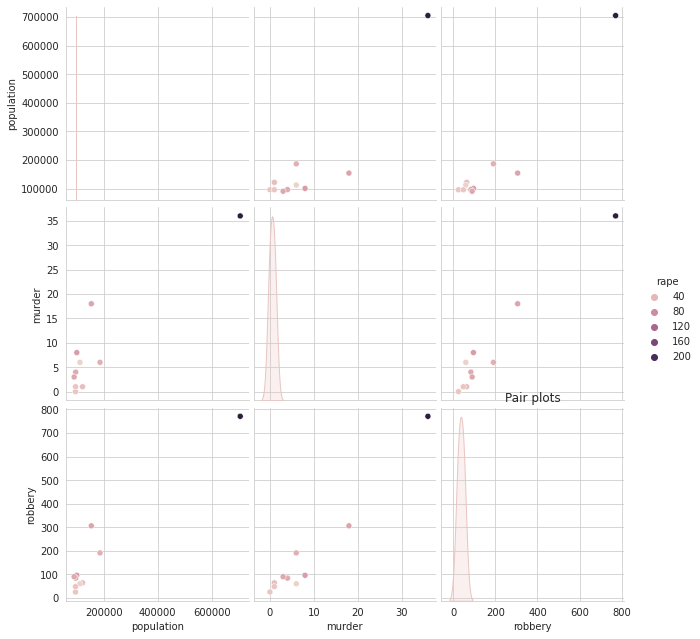

In [109]:
# Comparision of Major Crimes using Pairplot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(ImpMassCrime, hue="rape", size=3);
plt.title('Pair plots')
plt.show()

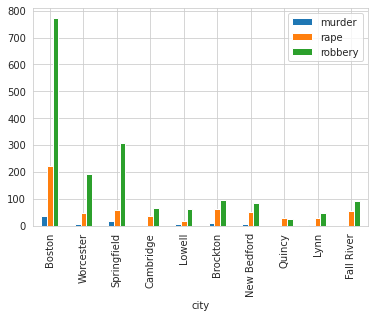

In [113]:
# Comparision of major crimes using bar plot for top 10 cities.
top10MassCrime.plot("city",[ "murder", "rape", "robbery"], kind = 'bar')

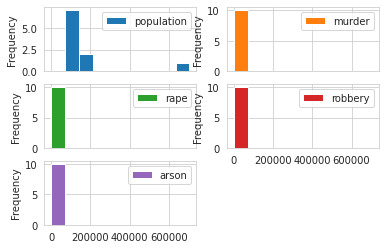

In [116]:
# Histogram plot in seperate Layouts
top10MassCrime.plot(kind = 'hist',subplots=True, layout = (3,2));

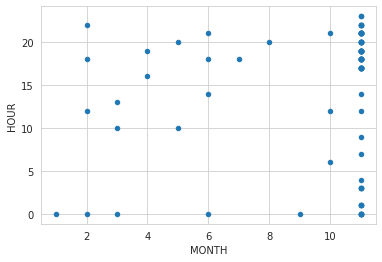

In [105]:
# GunCrime Month vs Time

top100bostonCrime = bostonCrime.head(100)
top100bostonCrime.plot(kind = 'scatter',x= 'MONTH',y='HOUR',  );

# Most Guncrimes occured in the Last Two Months ( November and December after 3 pm)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


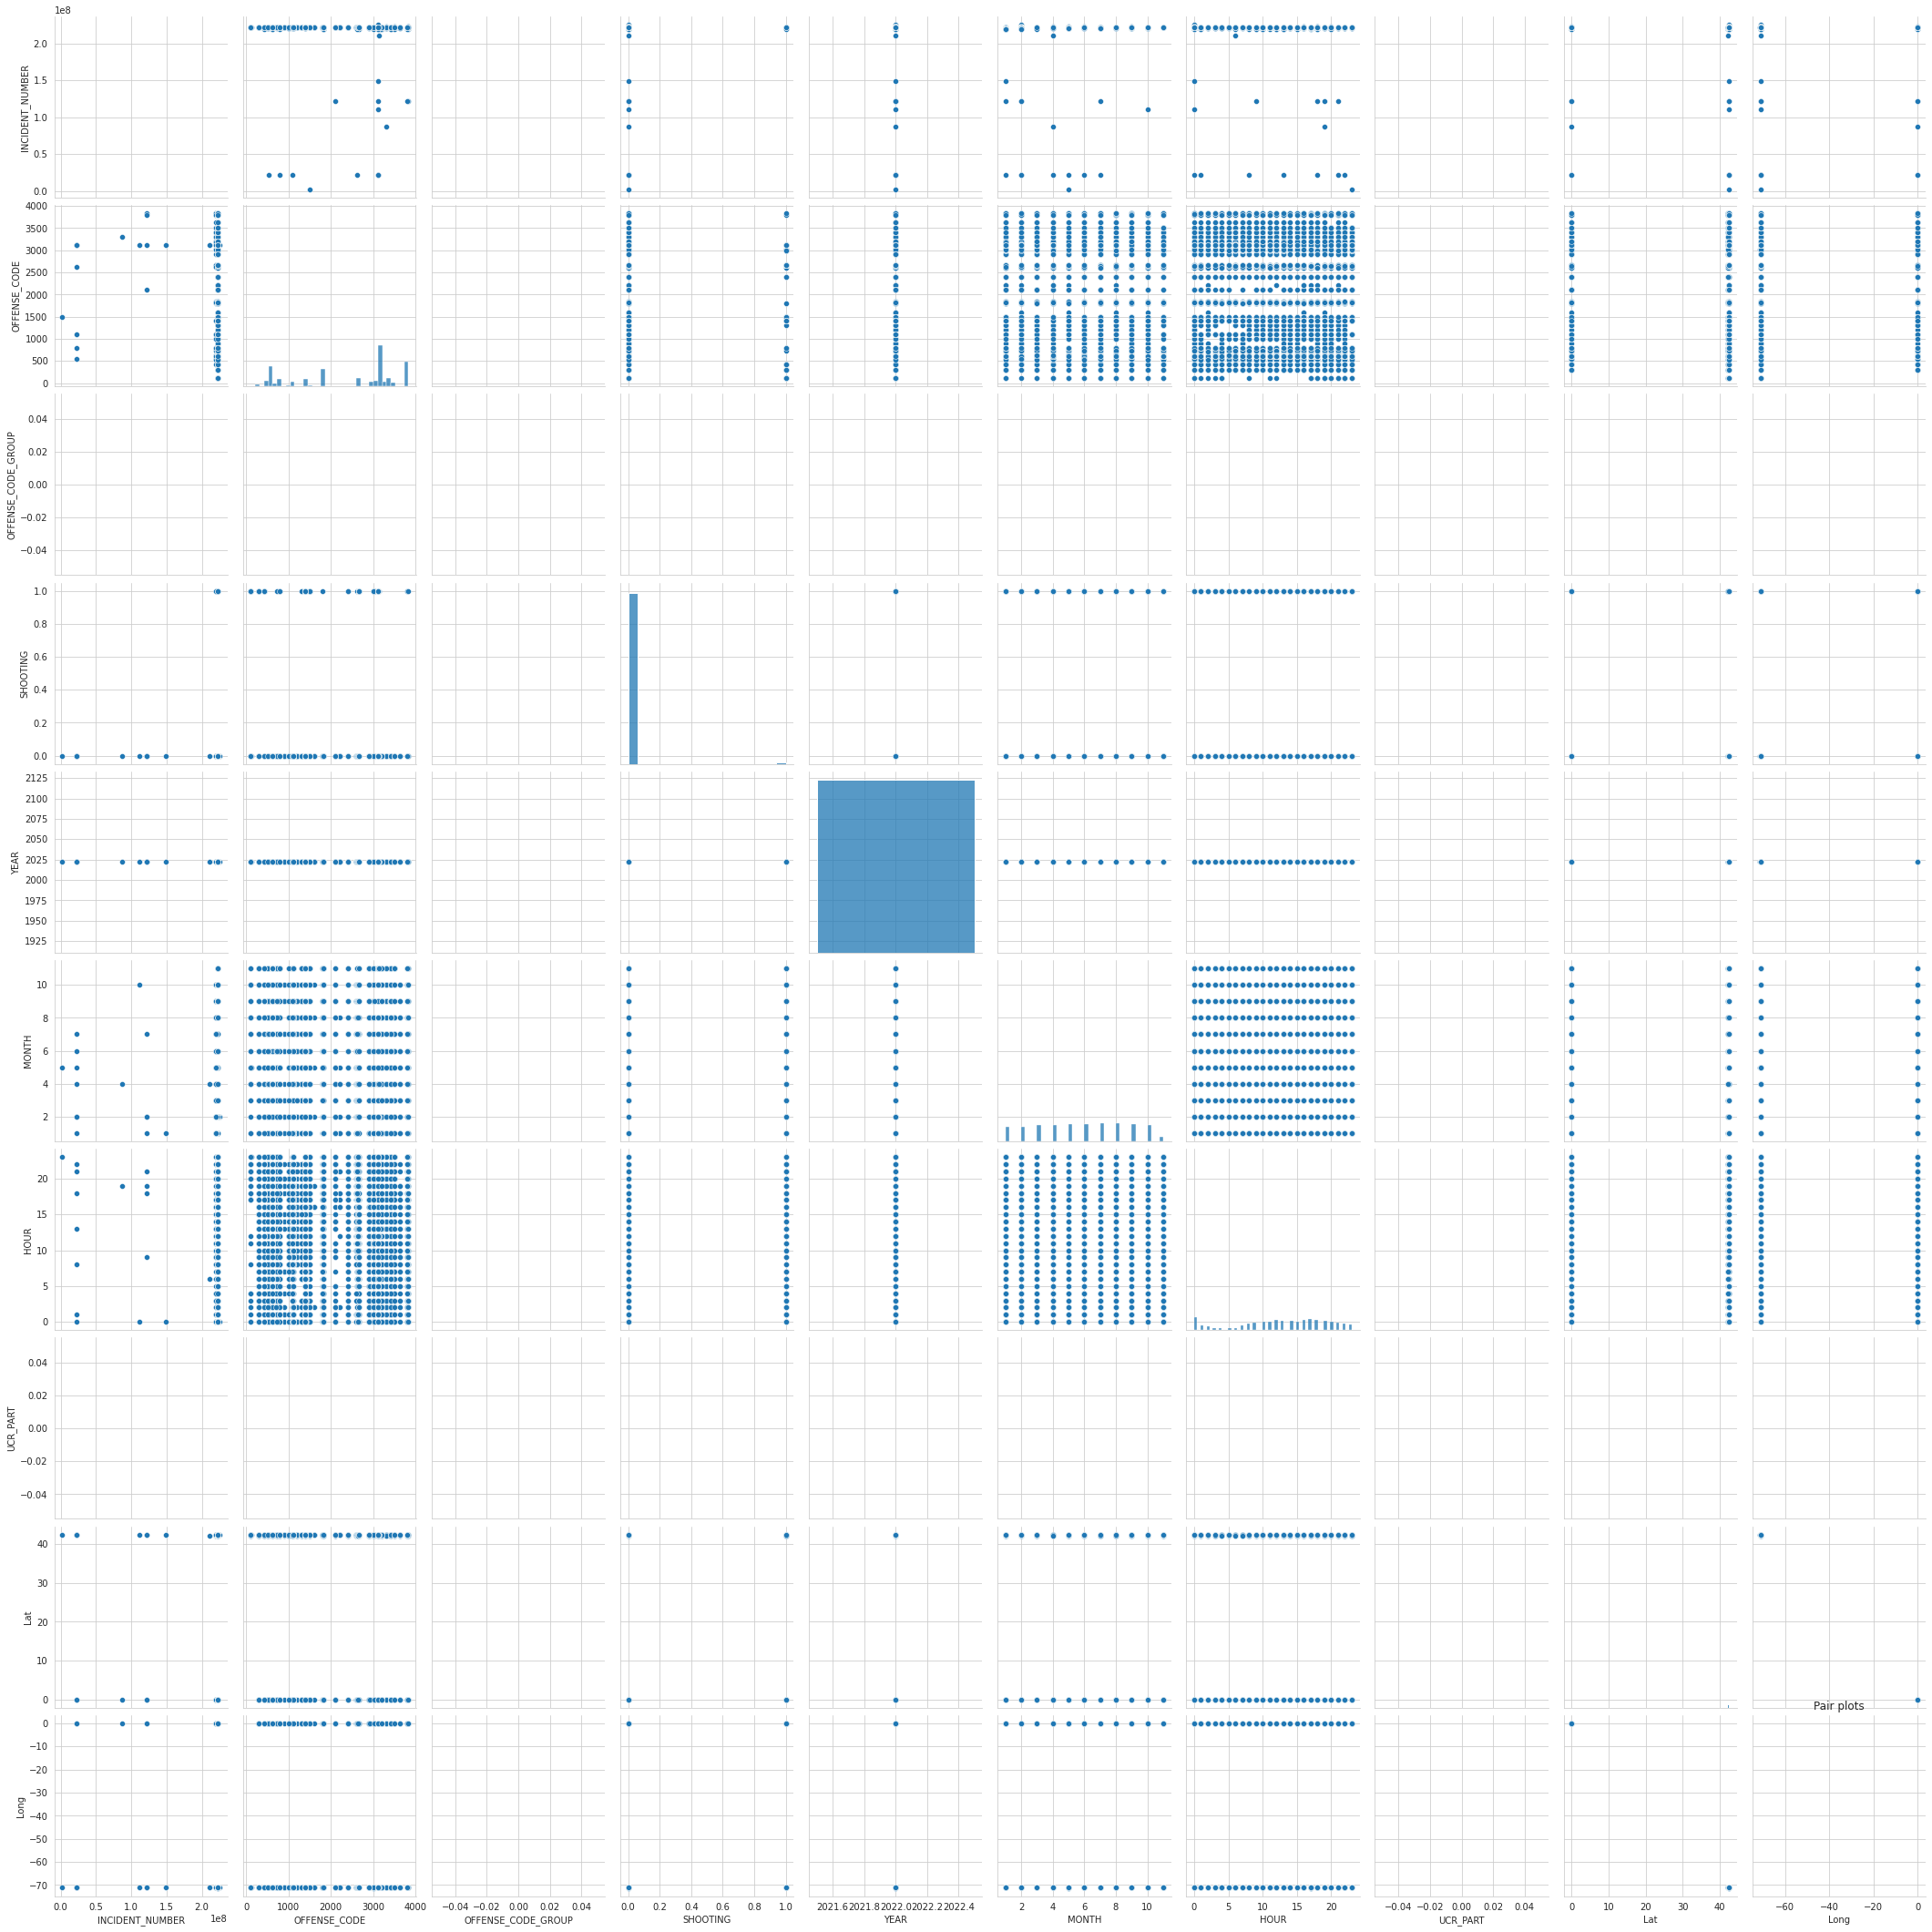

In [15]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(bostonCrime, size=3);
plt.title('Pair plots')
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.